In [65]:
import os,sys
import h5py as h5
import numpy as np
import matplotlib
from matplotlib import ticker
import os,sys
import matplotlib.pylab as plt





def make_time_series(f, stat, plev = 92500):
    
    f = h5.File(f)
    if not os.path.isdir('Plots/merging_offline_values_feedback/'):
        os.mkdir('Plots/merging_offline_values_feedback/')
    
    for var in ['34', '36', '38', '104', '105', '106', '107']:
        print('Analysing variable::: ', var )

        # getting variable chunk
        imin, imax = min(f['recordindices'][var][:]), max(f['recordindices'][var][:])
        z = f['observations_table']['z_coordinate'][imin:imax]
        source    = f['observations_table']['source_id'][imin:imax]
        dt = 1900 + f['observations_table']['date_time'][imin:imax]/(3600*24 * 365.25)
        flag    =  f['observations_table']['conversion_flag'][imin:imax]
        obs_val = f['observations_table']['observation_value'][imin:imax]
        era5_fb = f['era5fb']['an_depar@body'][imin:imax]

        
        # getting selected plevel
        ind_z = np.where(z == plev )[0]
        dt = dt[ind_z]
        source = source[ind_z]    
        era5_fb = era5_fb[ind_z]
        flag = flag[ind_z]
        obs_val = obs_val[ind_z] 


        
        # selecting sources
        sources =  np.array( [ b''.join(f).decode('utf-8') for f in source ] )

        ind_era5_1 = np.where( sources == 'era5_1')[0]
        ind_era5_2 = np.where( sources == 'era5_2')[0]
        ind_other = np.where( (sources !=  'era5_1' ) & ( sources !=  'era5_2' ) )[0]

        

        ##############################
        # era5fb 
        ##############################

        era5_1_fb = era5_fb[ind_era5_1]
        dt_era5_1 = dt[ind_era5_1]

        era5_2_fb = era5_fb[ind_era5_2]    
        dt_era5_2 = dt[ind_era5_2]

        other_fb = era5_fb[ind_other]
        dt_other_fb = dt[ind_other]

        print('Values for the calculated feedback: ', other_fb )
        
        fs = 12
        vars_name = {'34': 'Dew Point Departure' , 
                     '36': 'Dew Point',
                     '38': 'Relative Humidity',
                     '104': 'u-wind' , 
                     '105': 'u-wind' , 
                     '106': 'Wind Direction' , 
                     '107': 'Wind Speed'  }
        
        plt.plot(dt_era5_1 , era5_1_fb, label = 'ERA5 1 [' + str(len(dt_era5_1)) +']',
                 color = 'blue' )
        plt.plot(dt_era5_2 , era5_2_fb, label = 'ERA5 2 [' + str(len(dt_era5_2)) +']',
                color = 'lime' )
        plt.plot(dt_other_fb , other_fb, label = 'Other  [' + str(len(dt_other_fb)) +']',
                color = 'orange' )

        plt.title('ERA5 Analysis Departure for ' + vars_name[var] + ' - ' + stat + ' , p=' + str(plev),
                  fontsize = fs-2)
        plt.savefig('Plots/merging_offline_values_feedback/offline_feedback_' + var + '_' + stat + '.png' , dpi = 200 )
        plt.legend()
        plt.show()
        plt.close()

      
        ##############################
        # observation values 
        ##############################
        
        original_ind = np.where(flag != 0)[0]
        calc_ind      = np.where(flag == 0)[0]
                          
        val, counts = np.unique(flag, return_counts =True)
        print('Flags: ' , val, 'Counts: ' , counts )
    
        # selecting observation_value 
        
        original_val = obs_val[original_ind]
        calc_val = obs_val[calc_ind]
        
        dt_original = dt[original_ind]
        dt_calc = dt[calc_ind]

        plt.plot(dt_original , original_val, label = 'Original Val. [' + str(len(dt_original)) +']',
                 color = 'black' )
        plt.plot(dt_calc , calc_val, label = 'Calculated [' + str(len(dt_calc)) +']',
                 color = 'red' )
        
        plt.title('Observation Values for ' + vars_name[var] + ' - ' + stat + ' , p=' + str(plev), 
                  fontsize = fs-2)
        plt.savefig('Plots/merging_offline_values_feedback/offline_obsvalues_' + var + '_' + stat + '.png' , dpi = 200 )
        plt.legend()
        plt.show()
        plt.close()

    

# https://github.com/glamod/common_data_model/blob/master/tables/conversion_flag.dat 
# 0	Both original (non SI) and converted (SI) values available, see conversion_method for details.

# https://github.com/glamod/common_data_model/blob/master/tables/conversion_method.dat
# {2, 3, 4}
# 2 58	Station pressure converted to sea level pressure
# 3 Wind speed value in Beaufort scale converted to metres per second (m/s)	
# 4 Wind direction from 32 point compass	Wind direction converted from 32 point compass, 

#var = '34' # 34=dp depression, 36 = dp , 38 = relative humidity 

Analysing variable:::  34
Values for the calculated feedback:  [nan nan nan ... nan nan nan]


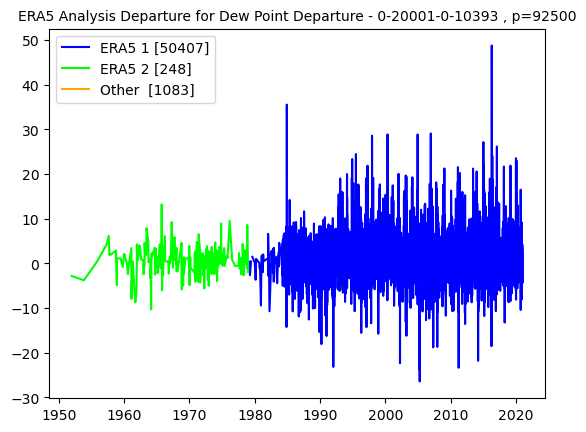

Flags:  [0] Counts:  [51738]


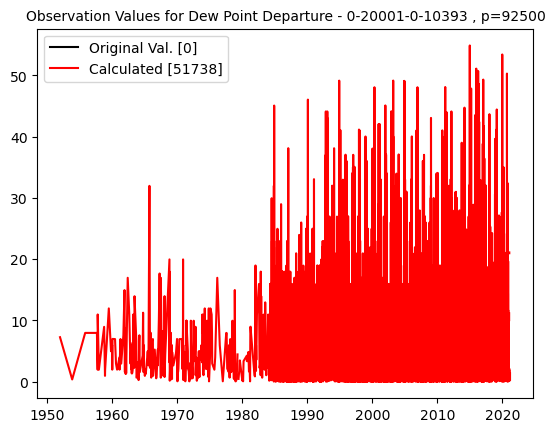

Analysing variable:::  36
Values for the calculated feedback:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

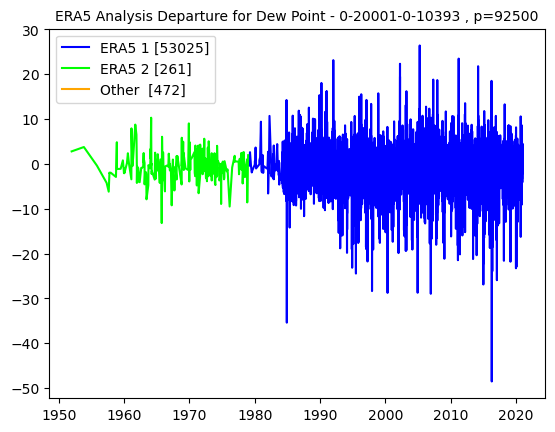

Flags:  [0] Counts:  [53758]


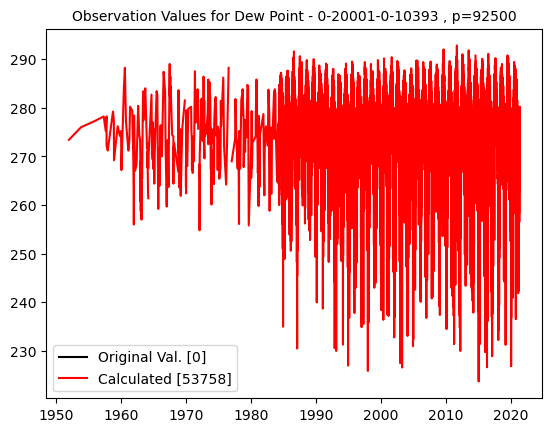

Analysing variable:::  38
Values for the calculated feedback:  [nan nan nan ... nan nan nan]


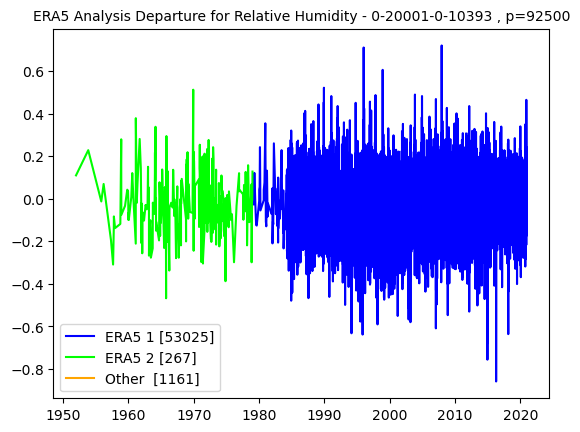

Flags:  [-2147483648           0] Counts:  [53291  1162]


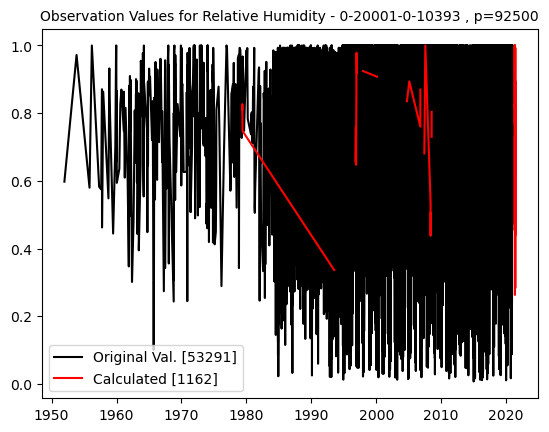

Analysing variable:::  104
Values for the calculated feedback:  [nan nan nan ... nan nan nan]


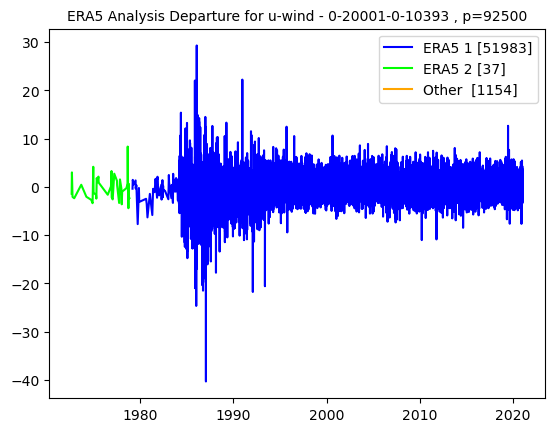

Flags:  [-2147483648           0] Counts:  [52020  1154]


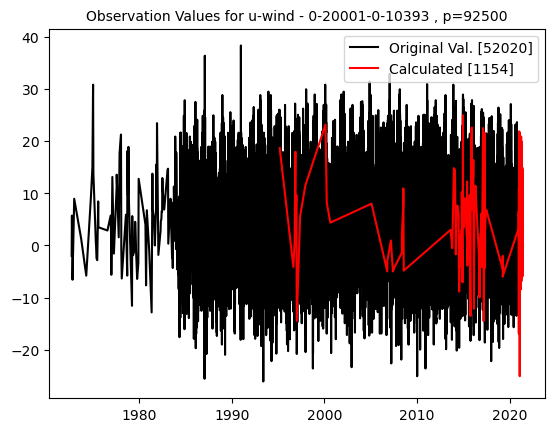

Analysing variable:::  105
Values for the calculated feedback:  [nan nan nan ... nan nan nan]


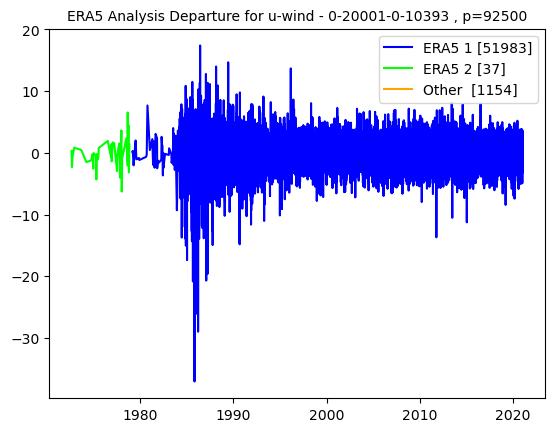

Flags:  [-2147483648           0] Counts:  [52020  1154]


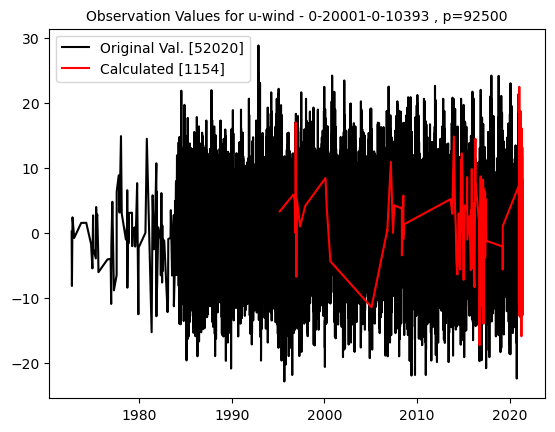

Analysing variable:::  106
Values for the calculated feedback:  [0. 0. 0. ... 0. 0. 0.]


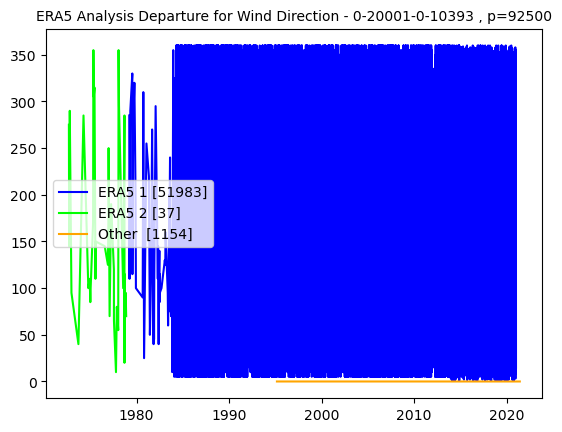

Flags:  [-2147483648           0] Counts:  [ 1154 52020]


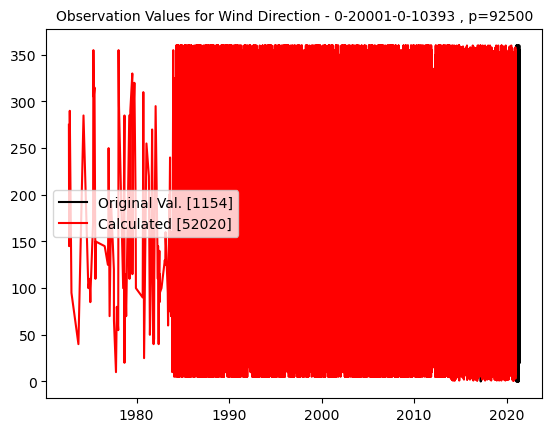

Analysing variable:::  107
Values for the calculated feedback:  [0. 0. 0. ... 0. 0. 0.]


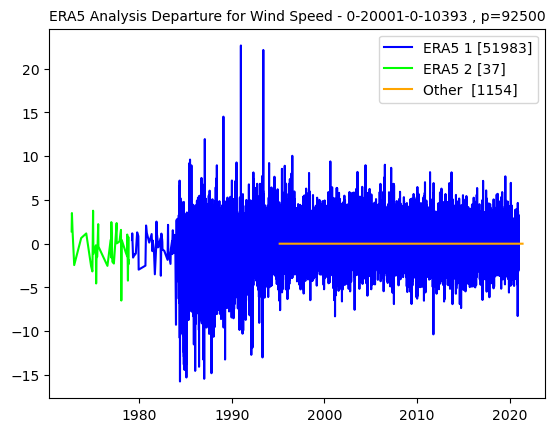

Flags:  [-2147483648] Counts:  [53174]


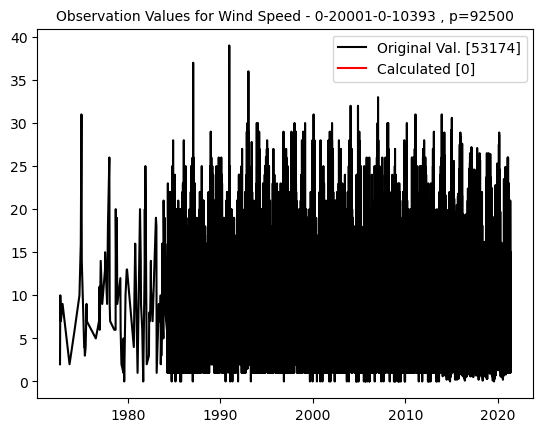

In [66]:
f = '/raid60/scratch/leo/scratch/converted_v7/0-20001-0-10393_CEUAS_merged_v1.nc'
stat = '0-20001-0-10393'
a = make_time_series(f,stat)

Analysing variable:::  34
Values for the calculated feedback:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


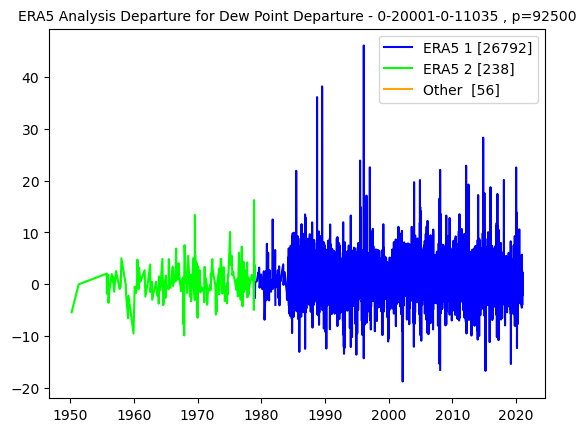

Flags:  [0] Counts:  [27086]


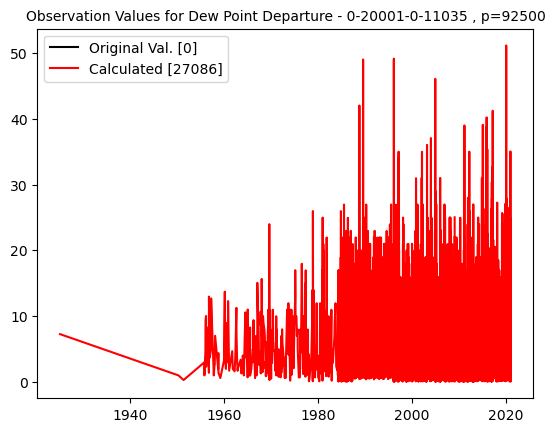

Analysing variable:::  36
Values for the calculated feedback:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]


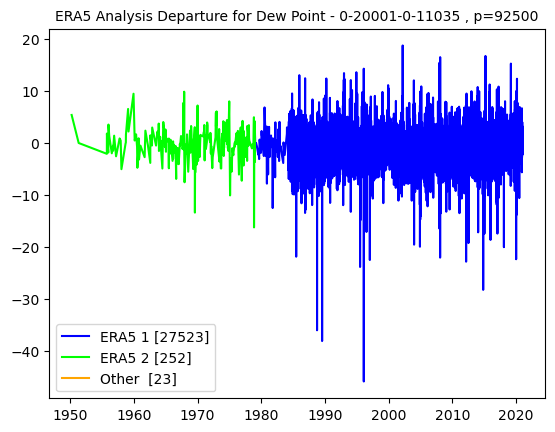

In [ ]:
f = '/raid60/scratch/leo/scratch/converted_v7/0-20001-0-11035_CEUAS_merged_v1.nc'
stat = '0-20001-0-11035'
a = make_time_series(f,stat)


In [ ]:
f = '/raid60/scratch/leo/scratch/converted_v7/0-20001-0-01001_CEUAS_merged_v1.nc'
stat = '0-20001-0-01001'
a = make_time_series(f,stat)

In [ ]:
f = '/raid60/scratch/leo/scratch/converted_v7/0-20001-0-01001_CEUAS_merged_v1.nc'
stat = '0-20001-0-01001'
a = make_time_series(f,stat)